In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
import datetime 
from datetime import date, timedelta
from sklearn.preprocessing import scale



# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.vector_ar.vecm import coint_johansen

import yfinance as yf



In [4]:
data=pd.read_pickle("ClosingPrices10Years")
data.to_csv(r'data.csv')
data

,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,AFL,...,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2011-06-01,24.835,NaN,18.070,56.990,11.925,34.125,NaN,61.015,12.745,23.335,...,145.870,NaN,NaN,34.675,NaN,39.175,42.845,NaN,22.965,NaN
2011-06-02,24.515,NaN,17.795,56.805,11.945,34.225,NaN,60.475,12.545,23.315,...,146.210,NaN,26.465,34.825,NaN,39.195,42.600,66.325,23.045,NaN
2011-06-03,24.440,NaN,17.290,55.835,11.845,33.275,NaN,59.785,12.455,23.240,...,143.415,NaN,26.330,33.735,NaN,39.135,41.615,65.795,22.885,NaN
2011-06-06,24.420,NaN,16.870,55.765,11.695,32.845,NaN,58.875,12.285,22.785,...,141.305,NaN,25.700,33.765,NaN,38.750,41.100,65.135,22.175,NaN
2011-06-07,24.600,NaN,17.115,56.275,11.575,33.005,NaN,58.415,12.315,22.735,...,136.095,NaN,25.305,34.195,NaN,38.955,41.250,64.505,21.785,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-24,117.310,115.910,279.760,284.845,96.505,497.715,77.435,190.670,25.695,56.360,...,129.445,71.670,23.895,123.790,115.880,120.545,501.665,167.775,57.520,176.395
2021-05-25,118.425,114.555,284.005,286.015,96.595,505.115,77.865,188.020,25.345,55.765,...,129.005,71.245,23.395,124.105,116.755,120.625,501.870,167.745,56.025,176.605
2021-05-26,116.755,114.705,282.135,284.035,97.315,507.020,78.345,189.005,25.475,56.265,...,132.425,70.995,23.735,123.710,116.855,120.505,501.455,164.240,56.715,175.320


In [5]:
#Calculating the returns from prices
data=data.pct_change()
#data=data.reset_index()

data=data.fillna(0)
data

,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,AFL,...,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2011-06-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-06-02,-0.012885,0.000000,-0.015219,-0.003246,0.001677,0.002930,0.000000,-0.008850,-0.015692,-0.000857,...,0.002331,0.000000,0.000000,0.004326,0.000000,0.000511,-0.005718,0.000000,0.003484,0.000000
2011-06-03,-0.003059,0.000000,-0.028379,-0.017076,-0.008372,-0.027757,0.000000,-0.011410,-0.007174,-0.003217,...,-0.019116,0.000000,-0.005101,-0.031299,0.000000,-0.001531,-0.023122,-0.007991,-0.006943,0.000000
2011-06-06,-0.000818,0.000000,-0.024291,-0.001254,-0.012664,-0.012923,0.000000,-0.015221,-0.013649,-0.019578,...,-0.014713,0.000000,-0.023927,0.000889,0.000000,-0.009838,-0.012375,-0.010031,-0.031025,0.000000
2011-06-07,0.007371,0.000000,0.014523,0.009146,-0.010261,0.004871,0.000000,-0.007813,0.002442,-0.002194,...,-0.036871,0.000000,-0.015370,0.012735,0.000000,0.005290,0.003650,-0.009672,-0.017587,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-24,0.001494,-0.001894,-0.000071,0.004815,0.011848,0.019647,0.003369,-0.021754,0.013010,0.006518,...,0.016451,-0.005343,0.006741,0.007734,0.003420,0.006849,0.014541,0.002809,-0.009812,0.002102
2021-05-25,0.009505,-0.011690,0.015174,0.004107,0.000933,0.014868,0.005553,-0.013898,-0.013621,-0.010557,...,-0.003399,-0.005930,-0.020925,0.002545,0.007551,0.000664,0.000409,-0.000179,-0.025991,0.001191
2021-05-26,-0.014102,0.001309,-0.006584,-0.006923,0.007454,0.003771,0.006165,0.005239,0.005129,0.008966,...,0.026511,-0.003509,0.014533,-0.003183,0.000856,-0.000995,-0.000827,-0.020895,0.012316,-0.007276


In [6]:
data.isnull().values.any()
count = np.isinf(data).values.sum()
count

0

In [413]:
maxlag=1
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(data, variables = data.columns)        

,ABT_x,ABBV_x,ABMD_x,ACN_x,ATVI_x,ADBE_x,AMD_x,AAP_x,AES_x,AFL_x,...,WYNN_x,XEL_x,XRX_x,XLNX_x,XYL_x,YUM_x,ZBRA_x,ZBH_x,ZION_x,ZTS_x
ABT_y,1.00000,0.40080,0.06400,0.03610,0.47110,0.02360,0.59110,0.04140,0.00360,0.20230,...,0.51980,0.03230,0.10060,0.96730,0.31440,0.45630,0.52550,0.22470,0.28160,0.15230
ABBV_y,0.04540,1.00000,0.91220,0.06600,0.16810,0.04250,0.02710,0.10890,0.90070,0.28330,...,0.20940,0.12380,0.55170,0.00620,0.09560,0.44480,0.32320,0.34550,0.68780,0.47850
ABMD_y,0.10030,0.56090,1.00000,0.40830,0.39180,0.77770,0.06930,0.44100,0.98650,0.32050,...,0.77050,0.57200,0.22020,0.40110,0.01030,0.90650,0.40860,0.02280,0.28520,0.29450
ACN_y,0.00590,0.08300,0.32040,1.00000,0.64430,0.14960,0.24260,0.58700,0.07510,0.38020,...,0.73670,0.00030,0.00290,0.48200,0.00340,0.77030,0.89050,0.45170,0.59340,0.00020
ATVI_y,0.10860,0.24160,0.01470,0.06090,1.00000,0.06490,0.11800,0.43670,0.22190,0.09070,...,0.85130,0.00000,0.02110,0.03930,0.00280,0.26010,0.30070,0.31940,0.01930,0.21910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YUM_y,0.00060,0.03580,0.30010,0.00000,0.68510,0.16140,0.76640,0.25400,0.00750,0.31100,...,0.06030,0.02830,0.00010,0.76910,0.01640,1.00000,0.31020,0.47050,0.05400,0.76800
ZBRA_y,0.02310,0.29530,0.01830,0.05220,0.31930,0.00590,0.77150,0.25180,0.31910,0.60320,...,0.45670,0.00910,0.00270,0.81360,0.41960,0.29130,1.00000,0.26670,0.64450,0.06520
ZBH_y,0.01130,0.75300,0.53030,0.03310,0.44000,0.36770,0.08570,0.00650,0.98330,0.78440,...,0.83210,0.86720,0.08340,0.25890,0.02710,0.09000,0.67420,1.00000,0.56750,0.23660
ZION_y,0.00180,0.06450,0.52760,0.04290,0.13340,0.01840,0.28390,0.96650,0.13720,0.12320,...,0.40040,0.05480,0.09080,0.78550,0.97080,0.22740,0.86530,0.96310,1.00000,0.26710


In [431]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

"""
    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.") 
        
"""

'\n    # Print Summary\n    print(f\'    Augmented Dickey-Fuller Test on "{name}"\', "\n   ", \'-\'*47)\n    print(f\' Null Hypothesis: Data has unit root. Non-Stationary.\')\n    print(f\' Significance Level    = {signif}\')\n    print(f\' Test Statistic        = {output["test_statistic"]}\')\n    print(f\' No. Lags Chosen       = {output["n_lags"]}\')\n\n    for key,val in r[4].items():\n        print(f\' Critical value {adjust(key)} = {round(val, 3)}\')\n\n    if p_value <= signif:\n        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")\n        print(f" => Series is Stationary.")\n    else:\n        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")\n        print(f" => Series is Non-Stationary.") \n        \n'

In [ ]:
# ADF Test on each column
for name, column in data_year.iteritems():
    adfuller_test(column, name=column.name)
    #print('\n')

In [ ]:
df_differenced = data_year.diff().dropna()
# ADF Test on each column of 1st Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    #print('\n')


In [426]:
# Second Differencing
df_differenced = df_differenced.diff().dropna()

In [ ]:
# ADF Test on each column of 2nd Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    #print('\n')

In [530]:
"""
#Slecting Start and end date
start_date=datetime.date(2012,6,1) 
end_date = start_date + timedelta(days=60)  
 
data_year=data[data.index<start_date] # Isolating the data for one year (06/01/2011 - 06/01/2012)
data_42days = data[start_date:end_date] # Isolating the data for 20 days since 06/01/2012
data_year=data_year.fillna(0)
data_42days=data_42days.fillna(0)

"""

In [ ]:
"""
model = VAR(data_20days)
x = model.select_order(maxlags=1)
x.summary()
"""

In [466]:
"""
#Scaling the features of the data_year

x_year = data_year.values
x_year = StandardScaler().fit_transform(x_year)
#Performing PCA on 1 year data 

pca_year = PCA(n_components=10) #identifying N of components that retain 85% of the data (59 out of 496)
PC_year = pca_year.fit_transform(x_year)


#Scaling the features of the data_20days

x_20days = data_20days.values
x_20days = StandardScaler().fit_transform(x_20days)
#Performing PCA on 1 year data 

pca_20days = PCA(n_components=10) #identifying N of components that retain 85% of the data (59 out of 496)
PC_20days = pca_20days.fit_transform(x_20days)

print(len(PC_year[0]),len(PC_20days[0]))
"""



10 10


In [475]:
"""
print((pca_year.explained_variance_ratio_))


#Sorting the values of the first principal component by how large each one is
df = pd.DataFrame({'PCA':pca_year.components_[0], 'Variable Names':list(pca_year.columns)})
df = df.sort_values('PCA', ascending=False)

#Sorting the absolute values of the first principal component by magnitude
df2 = pd.DataFrame(df)
df2['PCA']=df2['PCA'].apply(np.absolute)
df2 = df2.sort_values('PCA', ascending=False)
#print(df2['Variable Names'][0:11])

df.head()
"""

[0.56553921 0.024499   0.01649766 0.01288351 0.01234058 0.01090781
 0.01044252 0.00944005 0.00885822 0.00830335 0.00788105]


AttributeError: 'PCA' object has no attribute 'columns'

In [ ]:
"""
#Sorting the values of the first principal component by how large each one is

df = pd.DataFrame({'PCA':pca_year.components_[0], 'Variable Names':list(data_year.iloc[:,:0])})
df = df.sort_values('PCA', ascending=False)

#Sorting the absolute values of the first principal component by magnitude
df2 = pd.DataFrame(df)
df2['PCA']=df2['PCA'].apply(np.absolute)
df2 = df2.sort_values('PCA', ascending=False)
print(df2['Variable Names'][0:11])
df

"""

In [378]:
"""
loadings = pca_year.components_.T * np.sqrt(pca_year.explained_variance_)

loading_matrix = pd.DataFrame(loadings, columns=['PC1', 'PC2','PC3','PC4','PC5','PC6',
                                                 'PC7','PC8','PC9','PC10' ], index=data_year.columns)


#pd.set_option('display.float_format', lambda x: '%.5f' % x)


loading_matrix
"""

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
ABT,-0.73424,0.24880,-0.11662,-0.25818,0.00328,0.01232,-0.11901,-0.05402,-0.03409,0.04835
ABBV,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000
ABMD,-0.65771,-0.04029,0.00745,-0.06230,0.11207,-0.10373,-0.07228,0.07895,0.10767,0.02067
ACN,-0.80168,-0.11583,-0.08957,-0.12329,0.08942,-0.09616,0.03758,0.00287,0.11347,0.07253
ATVI,-0.59067,-0.12411,-0.10349,-0.12130,-0.01322,-0.04190,0.02264,-0.03498,-0.12542,-0.10082
...,...,...,...,...,...,...,...,...,...,...
YUM,-0.72176,-0.00287,-0.28771,0.07391,-0.15344,0.01552,-0.00992,-0.08052,-0.03432,0.14683
ZBRA,-0.83403,-0.03801,0.00922,-0.02927,0.09297,-0.10343,0.00054,0.06150,0.07228,-0.07888
ZBH,-0.78949,0.04391,-0.01458,-0.22522,-0.00062,0.03583,-0.15277,0.07775,-0.10829,0.03881
ZION,-0.81595,-0.05731,0.27033,-0.02598,-0.10753,0.04002,0.07941,-0.09979,-0.09485,0.05007


In [7]:
#Slecting Start and end date
start_date=datetime.date(2012,6,1) 
end_date = start_date + timedelta(days=60)  
 
data_year=data[data.index<start_date] # Isolating the data for one year (06/01/2011 - 06/01/2012)
data_42days = data[start_date:end_date] # Isolating the data for 20 days since 06/01/2012

In [8]:
#Scaling the features of the data
scaler=StandardScaler()
scaler.fit(data_year)
data_scaled_year = scaler.transform(data_year)

#Performing PCA on 1 year data
pca_year=PCA(n_components=11)
pca_year.fit(data_scaled_year)

len(pca_year.components_[0])

496

In [9]:

#Choosing the minimum number of principal components such that 95% of the variance is retained
pca_year = PCA(n_components=23)

pca_year.fit(data_year.fillna(0))

print(pca_year.n_components_) #114 components retain 95% of the data

pca_42days = PCA(.90)

pca_42days.fit(data_42days.fillna(0))


print(len(pca_year.components_), len(pca_42days.components_))




23
23 23


Text(0.5, 1.0, 'Variance explained by PCA components for 1 year data')

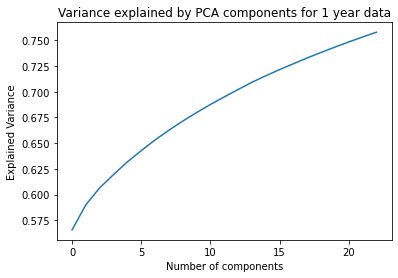

In [10]:
#print((pca.explained_variance_ratio_*100))
plt.plot(np.cumsum(pca_year.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Explained Variance')
plt.title("Variance explained by PCA components for 1 year data")

Text(0.5, 1.0, 'Variance explained by PCA components for 42 days ahead data')

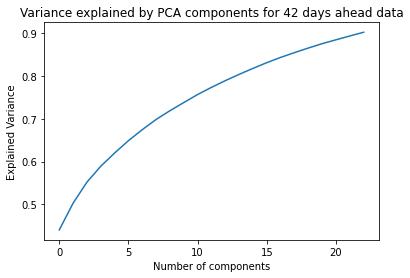

In [11]:
#print((pca.explained_variance_ratio_*100))
plt.plot(np.cumsum(pca_42days.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Explained Variance')
plt.title("Variance explained by PCA components for 42 days ahead data")

In [12]:
prices = yf.download(['SPY'], start='2011-06-01', end='2012-06-01')['Adj Close'] 

[*********************100%***********************]  1 of 1 completed


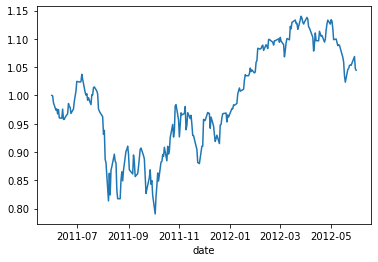

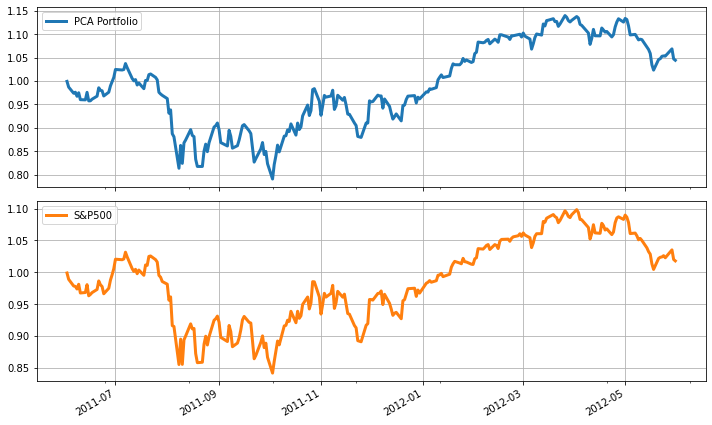

In [13]:
#formulating a portfolio of stocks by allocating the cash proportionally to the 
#1st principal component (i.e. linear combination of the input data), thus replicating the 
#returns of the S&P500 approximately


pc1=pca_year.components_[0]

weights = abs(pc1)/sum(abs(pc1))
myrs = (weights*data_year).sum(1)
myrs.cumsum().apply(np.exp).plot()



rs_df = pd.concat([myrs, prices.apply(np.log).diff(1)], 1)
rs_df.columns = ["PCA Portfolio", "S&P500"]

rs_df.dropna().cumsum().apply(np.exp).plot(subplots=True, figsize=(10,6), grid=True, linewidth=3);
plt.tight_layout()
plt.savefig('tmp.png')


In [14]:
column_names=[]

for i in range(len(pca_year.components_)):
    column_names.append(i+1)
    
len(column_names)

23

In [15]:
#The correlations between indices and PCs closely related to PC coefficients imply the contribution of
#each index to each PC.

loadings = pca_year.components_.T * np.sqrt(pca_year.explained_variance_)


loading_matrix = pd.DataFrame(loadings, columns=[column_names], index=data_year.columns)


pd.set_option('display.float_format', lambda x: '%.5f' % x)


loading_matrix


,1,2,3,4,5,6,7,8,9,10,...,14,15,16,17,18,19,20,21,22,23
ABT,-0.00748,0.00157,0.00232,-0.00131,0.00205,-0.00083,-0.00080,0.00095,-0.00132,0.00068,...,0.00019,-0.00035,-0.00033,0.00025,0.00005,-0.00002,0.00010,0.00015,-0.00034,0.00095
ABBV,0.00000,-0.00000,0.00000,0.00000,-0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,...,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000
ABMD,-0.02435,-0.00070,0.00160,-0.00253,0.00125,0.00607,-0.00572,0.00160,-0.00709,-0.00045,...,-0.00137,-0.00633,0.01006,0.00223,0.00244,-0.00017,-0.00486,0.00647,-0.00361,0.00242
ACN,-0.01544,-0.00220,-0.00042,-0.00312,0.00327,0.00135,-0.00092,-0.00058,-0.00023,0.00145,...,-0.00059,-0.00142,-0.00095,0.00002,-0.00058,0.00001,-0.00005,-0.00095,0.00166,-0.00010
ATVI,-0.00902,-0.00193,-0.00017,0.00073,0.00164,-0.00068,0.00007,0.00112,0.00017,0.00070,...,-0.00126,-0.00061,-0.00101,0.00133,0.00049,-0.00101,0.00049,0.00090,0.00013,-0.00013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YUM,-0.01123,-0.00201,0.00405,0.00060,0.00149,-0.00196,0.00114,-0.00162,0.00056,0.00033,...,-0.00087,0.00049,0.00018,-0.00117,0.00048,-0.00177,0.00197,-0.00065,-0.00008,0.00000
ZBRA,-0.01755,-0.00084,0.00014,-0.00062,0.00014,0.00002,-0.00226,0.00065,-0.00202,-0.00115,...,-0.00087,-0.00146,-0.00054,0.00004,-0.00048,-0.00017,-0.00093,-0.00078,0.00124,0.00054
ZBH,-0.01345,0.00094,0.00098,-0.00015,0.00136,-0.00022,0.00090,0.00097,-0.00341,0.00290,...,0.00002,-0.00067,-0.00085,-0.00183,0.00099,-0.00031,0.00062,-0.00152,-0.00109,0.00063
ZION,-0.02465,0.00551,-0.00550,0.00352,-0.00115,-0.00197,0.00131,-0.00203,0.00132,0.00097,...,-0.00072,0.00122,-0.00071,-0.00039,0.00004,-0.00138,0.00128,-0.00040,-0.00310,-0.00243


In [16]:
loadings_42days = pca_42days.components_.T * np.sqrt(pca_42days.explained_variance_)

loading_matrix_42days = pd.DataFrame(loadings_42days, columns=[column_names], index=data_42days.columns)


pd.set_option('display.float_format', lambda x: '%.5f' % x)


loading_matrix_42days



,1,2,3,4,5,6,7,8,9,10,...,14,15,16,17,18,19,20,21,22,23
ABT,-0.00700,-0.00059,-0.00150,-0.00013,-0.00006,-0.00254,0.00081,-0.00137,-0.00009,-0.00049,...,0.00052,-0.00143,-0.00060,0.00114,0.00106,-0.00056,-0.00041,-0.00060,-0.00082,0.00034
ABBV,0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000,0.00000,-0.00000,-0.00000,...,0.00000,0.00000,-0.00000,-0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,0.00000
ABMD,-0.01851,-0.00269,-0.00384,-0.00046,-0.00095,-0.00492,0.00057,-0.00041,0.00168,0.00026,...,0.00134,0.00524,0.00776,-0.00201,0.00402,-0.00068,-0.00307,0.00460,0.00082,0.00246
ACN,-0.01598,0.00109,0.00232,0.00074,0.00086,-0.00207,0.00341,0.00117,0.00070,-0.00080,...,0.00146,0.00093,0.00155,-0.00303,0.00131,0.00099,-0.00058,0.00046,0.00134,0.00062
ATVI,-0.01242,-0.00190,0.00407,0.00358,-0.00026,-0.00147,-0.00287,0.00423,-0.00363,0.00201,...,0.00224,-0.00272,0.00142,0.00346,-0.00001,0.00157,-0.00051,0.00113,0.00136,0.00168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YUM,-0.01452,0.00085,-0.00060,-0.00183,-0.00553,0.00103,0.00128,0.00021,0.00349,0.00106,...,-0.00049,-0.00148,-0.00213,-0.00030,-0.00012,0.00018,-0.00414,-0.00107,0.00021,0.00539
ZBRA,-0.01032,-0.00068,0.00539,0.00166,-0.00159,-0.00235,0.00062,-0.00008,0.00081,-0.00330,...,0.00157,-0.00006,-0.00141,0.00109,0.00130,0.00367,-0.00011,-0.00079,-0.00149,0.00266
ZBH,-0.00967,-0.00772,0.00025,0.00214,-0.00105,-0.00396,-0.00054,0.00026,0.00071,-0.00013,...,0.00061,0.00088,0.00054,0.00121,0.00208,-0.00219,-0.00041,-0.00059,0.00041,-0.00258
ZION,-0.01721,-0.00235,-0.00498,0.00248,0.00074,-0.00158,-0.00087,0.00058,0.00028,0.00118,...,0.00048,0.00022,-0.00233,0.00426,-0.00025,-0.00026,0.00135,0.00104,-0.00131,-0.00172


In [17]:
#The percentage change in the correlation from 1 year data to 20 days data

subtractionResults = ((loading_matrix_42days - loading_matrix)/loading_matrix)*100
subtractionResults


,1,2,3,4,5,6,7,8,9,10,...,14,15,16,17,18,19,20,21,22,23
ABT,-6.44978,-137.62906,-164.75587,-90.31237,-102.68428,206.82425,-200.19939,-243.65353,-93.03383,-171.20162,...,166.13731,310.27852,83.60360,353.71233,1995.39120,2165.69201,-502.88741,-500.62025,143.68864,-64.42373
ABBV,-40.13632,7.53254,-578.63740,8204.66698,-1625.07493,-298.99872,-401.85563,-404.98082,-309.76139,290.79506,...,-638.35137,-7094.86994,2787.05470,553.14820,-837.89169,126.35247,-203.80194,-15.98579,-483.15233,2014.36008
ABMD,-23.99332,283.42023,-340.13921,-81.68917,-175.82725,-180.97125,-110.04300,-125.46569,-123.77004,-157.89940,...,-197.35203,-182.79202,-22.83005,-190.01689,64.75867,310.92441,-36.94617,-28.82003,-122.61009,1.72835
ACN,3.52621,-149.68956,-650.92894,-123.68170,-73.61410,-253.27244,-471.83150,-301.20774,-400.36921,-155.60199,...,-345.84357,-165.21853,-262.77912,-14317.60104,-325.31892,6808.27905,1112.99582,-148.09042,-19.07686,-724.99416
ATVI,37.69654,-1.71291,-2544.20155,392.71880,-115.79282,116.37250,-4172.51409,278.29758,-2230.56205,186.49724,...,-278.47167,343.65021,-240.21799,159.69233,-101.93398,-256.23265,-204.27880,25.77028,957.23733,-1389.67925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YUM,29.29635,-142.23053,-114.84801,-405.36605,-471.37730,-152.71498,12.64089,-113.13134,527.56522,219.11874,...,-44.30667,-402.81988,-1276.03834,-74.23832,-124.86221,-109.95120,-310.40797,64.00063,-363.70964,115291.24270
ZBRA,-41.18097,-19.73657,3713.27624,-369.02277,-1227.34998,-11792.32923,-127.56204,-112.41451,-140.27888,185.32010,...,-280.89028,-95.72655,160.96118,2830.98215,-372.28628,-2274.12647,-88.28386,0.99686,-219.70452,392.75226
ZBH,-28.09005,-918.51127,-74.32644,-1478.39054,-177.03267,1662.99575,-160.63397,-73.75922,-120.88587,-104.38955,...,2497.90094,-232.53359,-163.73393,-166.21444,110.47893,596.80218,-165.93445,-61.07304,-137.90703,-506.63784
ZION,-30.16813,-142.73630,-9.34162,-29.39965,-164.05363,-19.69912,-166.38361,-128.30829,-78.59586,20.97074,...,-166.12771,-81.69866,225.85917,-1192.05809,-705.76887,-81.35002,5.96032,-362.44318,-57.57459,-29.21934


200 200


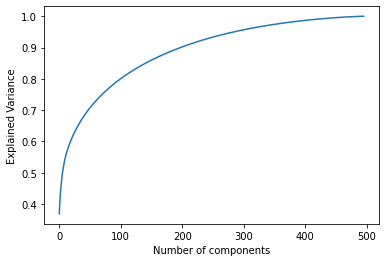

In [18]:
#PCA on the market returns (the first 20 components)

pca = PCA().fit(data.fillna(0))
pc1 = pd.Series(index=data.columns, data=pca.components_[0])
pc1
#print((pca.explained_variance_ratio_*100))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Explained Variance')

#Since Based on the graph 200 components roughly explain the 90% of the data I will choose 200 components

pca_bla = PCA(n_components=200).fit(data.fillna(0))
print(len(pca_bla.components_), len(pca_bla.singular_values_))




